**K-Means Clustering**

**Overview**

Online retail is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The steps are broadly:

Read and understand the data
Clean the data
Prepare the data for modelling
Modelling
Final analysis and reco

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/Clustering')

**1. Read and visualise the data**

In [3]:
# importing different libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from  scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [4]:
# read the data set
retail_df = pd.read_csv('Online+Retail.csv', sep = ',', encoding= 'ISO-8859-1', header=0)

In [5]:
#checking the top rows of the data
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom

In [6]:
# basic of the df

retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**2. Clean the data**

In [7]:
# missing values

retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# dropping the missing values
retail_df = retail_df.dropna()

In [9]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
#shape
retail_df.shape

(406829, 8)

In [11]:
# checking the head
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom

In [12]:
# new column : amount
retail_df['amount'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [13]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  amount  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom   15.30  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom   20.34  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom   22.00  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom   20.34  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom   20.34

**3. Prepare the data for modelling**

R (Recency): Number of days since last purchase

F (Frequency): Number of tracsactions

M (Monetary): Total amount of transactions (revenue contributed)

In [14]:
#monetary

grouped_df = retail_df.groupby('CustomerID')['amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

CustomerID   amount
0     12346.0     0.00
1     12347.0  4310.00
2     12348.0  1797.24
3     12349.0  1757.55
4     12350.0   334.40

In [15]:
# frequency

frequency = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'ferquency']
frequency.head()

CustomerID  ferquency
0     12346.0          2
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17

In [16]:
# merged two df

grouped_df = pd.merge(grouped_df, frequency, on='CustomerID', how='inner')
grouped_df.head()


CustomerID   amount  ferquency
0     12346.0     0.00          2
1     12347.0  4310.00        182
2     12348.0  1797.24         31
3     12349.0  1757.55         73
4     12350.0   334.40         17

In [17]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  amount  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom   15.30  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom   20.34  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom   22.00  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom   20.34  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom   20.34

In [18]:
retail_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
amount         float64
dtype: object

In [19]:
#recency

In [20]:
# convert to datatime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [21]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  amount  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34

In [22]:
max_date = max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [23]:
retail_df['Diff']= max_date - retail_df['InvoiceDate']
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  amount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   20.34   

               Diff  
0 373 days 04:24:00  
1 373 days 04:24:00  
2 373 days 04:24:00  
3 373 days 04:24:00  
4 373 days 04:24:00

In [24]:
#recency

last_purchase = retail_df.groupby('CustomerID')['Diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

CustomerID              Diff
0     12346.0 325 days 02:33:00
1     12347.0   1 days 20:58:00
2     12348.0  74 days 23:37:00
3     12349.0  18 days 02:59:00
4     12350.0 309 days 20:49:00

In [25]:
# merging
grouped_df = pd.merge(grouped_df, last_purchase, on= 'CustomerID', how= 'inner')
grouped_df.columns = ['CustomerID', 'amount', 'frequency', 'recency']
grouped_df.head()

CustomerID   amount  frequency           recency
0     12346.0     0.00          2 325 days 02:33:00
1     12347.0  4310.00        182   1 days 20:58:00
2     12348.0  1797.24         31  74 days 23:37:00
3     12349.0  1757.55         73  18 days 02:59:00
4     12350.0   334.40         17 309 days 20:49:00

In [26]:
# number of days only

grouped_df['recency'] = grouped_df['recency'].dt.days


In [27]:
grouped_df.head()

CustomerID   amount  frequency  recency
0     12346.0     0.00          2      325
1     12347.0  4310.00        182        1
2     12348.0  1797.24         31       74
3     12349.0  1757.55         73       18
4     12350.0   334.40         17      309

{'whiskers': [<matplotlib.lines.Line2D at 0x7e3f2ea29d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3f2ea2a3c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3f2ea28aa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e3f2ea2a9c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e3f2ea2acf0>],
 'means': []}

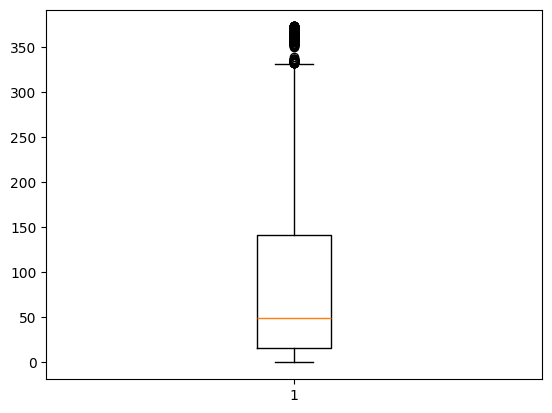

In [28]:
# outiler treatment
plt.boxplot(grouped_df['recency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e3f2e9f2900>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3f2e9f2f00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3f2e9f2750>],
 'medians': [<matplotlib.lines.Line2D at 0x7e3f2e9f34d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e3f2e9f37a0>],
 'means': []}

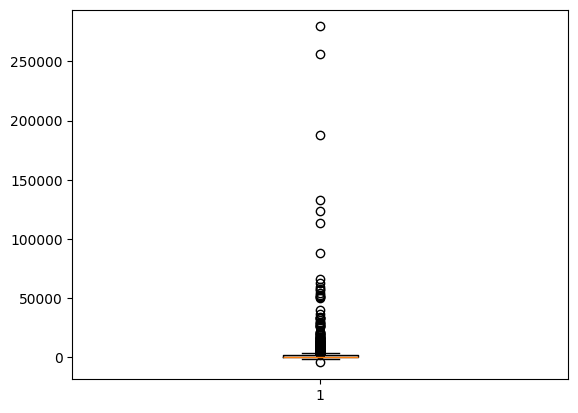

In [29]:
plt.boxplot(grouped_df['amount'])

In [30]:
plt.boxplot(grouped_df['frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e3f2e9c06b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3f2ea68620>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3f2ea691f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e3f2ea69d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e3f2ea6a030>],
 'means': []}

In [31]:
# two types of outliers:
# - statistical
# - domain specific

In [32]:
# removing (statistical) outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]





In [33]:
# scaling

rfm_df = grouped_df[['amount', 'frequency', 'recency']]

# instantiate

scaler = StandardScaler()

# fit transform

rfm_df_scaled = scaler.fit_transform(rfm_df)

In [34]:
rfm_df_scaled.shape

(4293, 3)

In [35]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frquency', 'recency']

rfm_df_scaled.head()

amount  frquency   recency
0 -0.723738 -0.752888  2.301611
1  1.731617  1.042467 -0.906466
2  0.300128 -0.463636 -0.183658
3  0.277517 -0.044720 -0.738141
4 -0.533235 -0.603275  2.143188

4. Modelling

In [36]:
# kmeans with some arbitary k

kmeans = KMeans(n_clusters = 4, max_iter = 50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [37]:
kmeans.labels_

array([0, 1, 3, ..., 0, 3, 3], dtype=int32)

Finding optimal number of clusters

SSD

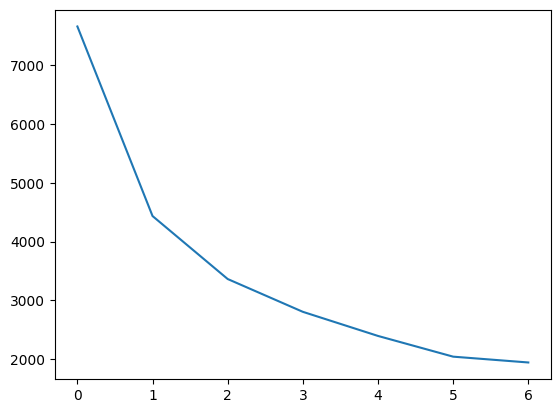

In [38]:
# elbow-curve/ SSD

ssd = []

range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
  kmeans = KMeans( n_clusters = num_clusters, max_iter= 50)
  kmeans.fit(rfm_df_scaled)
  ssd.append(kmeans.inertia_)



#plot ssd for n_clusters
plt.plot(ssd)

Each point on the line shows how “tight” the clusters are for a given number of clusters (k).

As k increases, the clusters get smaller and tighter → so the line goes down.

But after a certain point, the improvement becomes very small (the curve flattens).

In the graph:

Big improvement from k=2 → k=3 → k=4.

After k=3, the curve flattens (less improvement).

So the best choice is around 3 clusters.

**Silhouette Analysis**

silhouette score= p−q/max(p,q)

p  is the mean distance to the points in the nearest cluster that the data point is not a part of

q  is the mean intra-cluster distance to all the points in its own cluster.

- The value of the silhouette score range lies between -1 to 1.

- A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

- A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [39]:
from sklearn.metrics import silhouette_score

In [40]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))




For n_clusters=2, the silhouette score is 0.4025940739563748
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.48506020563508856
For n_clusters=5, the silhouette score is 0.4143143605302885
For n_clusters=6, the silhouette score is 0.41701275166264423
For n_clusters=7, the silhouette score is 0.4141889157307431
For n_clusters=8, the silhouette score is 0.3852148936893778


In [41]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [42]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

In [43]:
# assign the label

grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

CustomerID   amount  frequency  recency  cluster_id
0     12346.0     0.00          2      325           2
1     12347.0  4310.00        182        1           1
2     12348.0  1797.24         31       74           0
3     12349.0  1757.55         73       18           0
4     12350.0   334.40         17      309           2

In [44]:
#plot
sns.boxplot(x= 'cluster_id', y='amount', data = grouped_df)

<Axes: xlabel='cluster_id', ylabel='amount'>

**Hierarchical clustering**

In [45]:
rfm_df_scaled.head()

amount  frquency   recency
0 -0.723738 -0.752888  2.301611
1  1.731617  1.042467 -0.906466
2  0.300128 -0.463636 -0.183658
3  0.277517 -0.044720 -0.738141
4 -0.533235 -0.603275  2.143188

In [46]:
grouped_df.head()

CustomerID   amount  frequency  recency  cluster_id
0     12346.0     0.00          2      325           2
1     12347.0  4310.00        182        1           1
2     12348.0  1797.24         31       74           0
3     12349.0  1757.55         73       18           0
4     12350.0   334.40         17      309           2

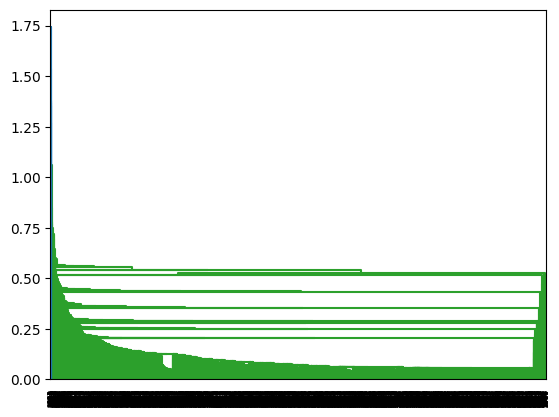

In [47]:
# single linkage

mergings = linkage(rfm_df_scaled, method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

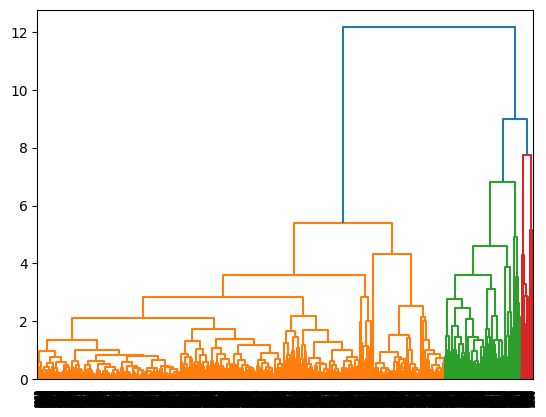

In [48]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [49]:
# clusters

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [50]:
# assign cluster lables

grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

CustomerID   amount  frequency  recency  cluster_id  cluster_labels
0     12346.0     0.00          2      325           2               0
1     12347.0  4310.00        182        1           1               1
2     12348.0  1797.24         31       74           0               0
3     12349.0  1757.55         73       18           0               0
4     12350.0   334.40         17      309           2               0

<Axes: xlabel='cluster_labels', ylabel='recency'>

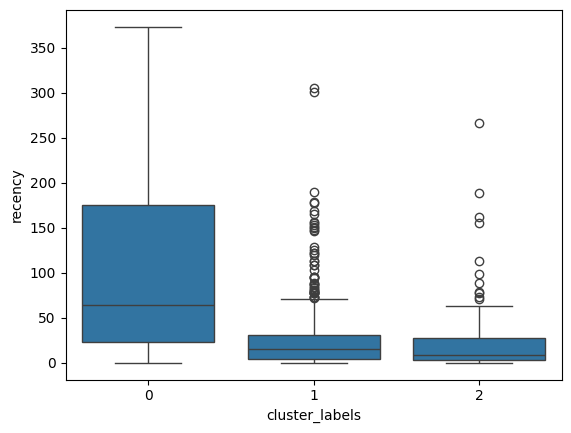

In [51]:
# plots
sns.boxplot(x='cluster_labels', y='recency', data=grouped_df)

In [52]:
# plots
sns.boxplot(x='cluster_labels', y='frequency', data=grouped_df)

<Axes: xlabel='cluster_labels', ylabel='frequency'>

In [53]:
# plots
sns.boxplot(x='cluster_labels', y='amount', data=grouped_df)

<Axes: xlabel='cluster_labels', ylabel='amount'>

**Conclusion**

In this project, we applied K-Means clustering and Hierarchical clustering on the Online Retail dataset to segment customers based on the RFM model (Recency, Frequency, Monetary value).

**Data Preparation**

Cleaned the dataset by handling missing values and creating the Amount, Frequency, and Recency features.

Removed outliers using statistical methods (IQR approach) to avoid skewed clustering.

Standardized the data using StandardScaler to ensure features were on the same scale.

**Model Selection**

The Elbow Method and Silhouette Analysis were used to determine the optimal number of clusters.

Both methods suggested that 3 clusters provided the best segmentation balance.

**Cluster Insights**

Cluster 0: Low monetary value, low frequency, and high recency → Inactive or low-value customers.

Cluster 1: Moderate spending and frequency, medium recency → Potential/regular customers.

Cluster 2: High frequency, high spending, and very recent transactions → Loyal and high-value customers.

**Business Implications**

Cluster 0 customers may need re-engagement campaigns (special offers, email reminders).

Cluster 1 customers can be nurtured with loyalty programs and targeted promotions to increase spending.

Cluster 2 customers should be retained with VIP programs, premium services, and exclusive offers.

By segmenting customers with RFM-based clustering, the business can adopt a data-driven marketing strategy to improve customer retention, revenue, and engagement.